In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize

In [2]:
sns.set(style="whitegrid")

In [3]:
file_path = 'Daily Household Transactions.csv'
data = pd.read_csv(file_path)

In [4]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

<ipython-input-4-b63fab1fd0d2>:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce')


In [5]:
data['Subcategory'] = data['Subcategory'].fillna('Unknown')
data['Note'] = data['Note'].fillna('')

In [6]:
assert data['Currency'].nunique() == 1, "Multiple currencies detected!"

<ipython-input-7-8862cc737f08>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Income/Expense', data=data, palette='pastel')


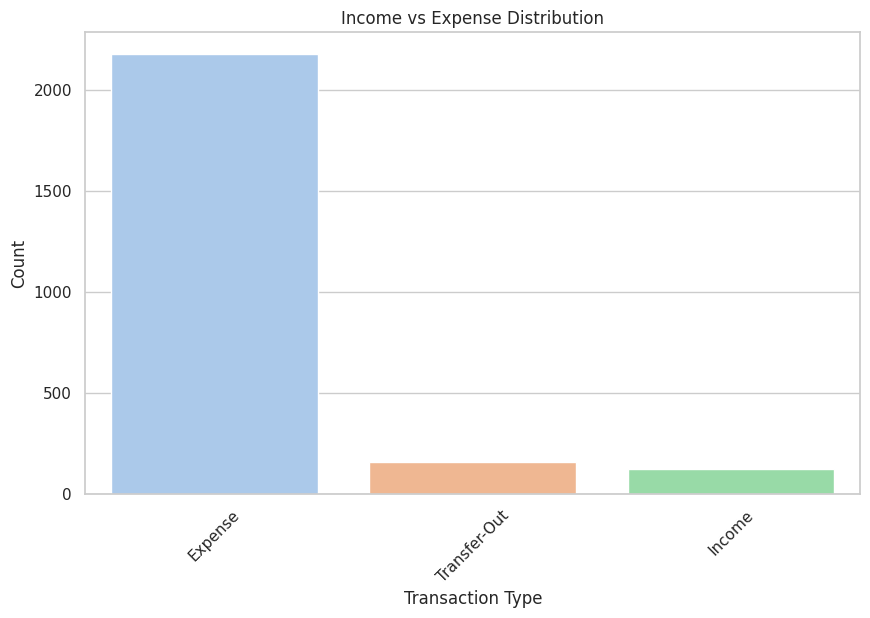

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Income/Expense', data=data, palette='pastel')
plt.title('Income vs Expense Distribution')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<ipython-input-8-fcb5d5ef714d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_counts.index, x=category_counts.values, palette='pastel')


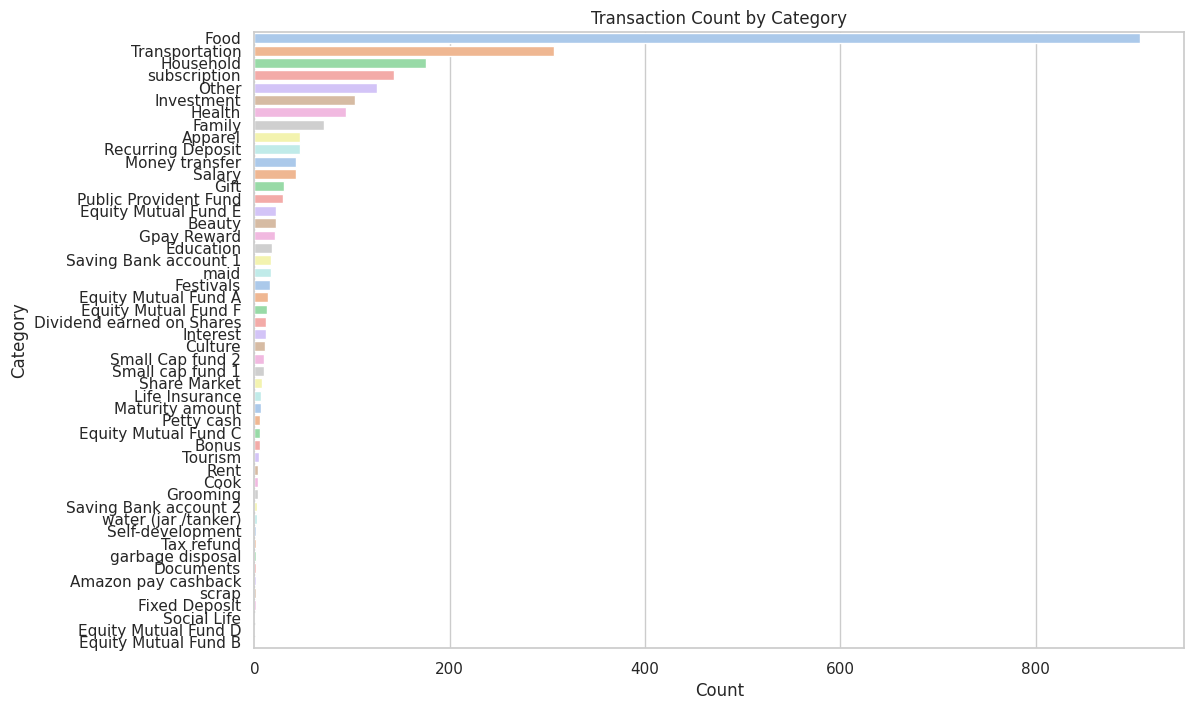

In [8]:
plt.figure(figsize=(12, 8))
category_counts = data['Category'].value_counts()
sns.barplot(y=category_counts.index, x=category_counts.values, palette='pastel')
plt.title('Transaction Count by Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

<ipython-input-9-9eb47d68db5a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=mode_counts.index, x=mode_counts.values, palette='pastel')


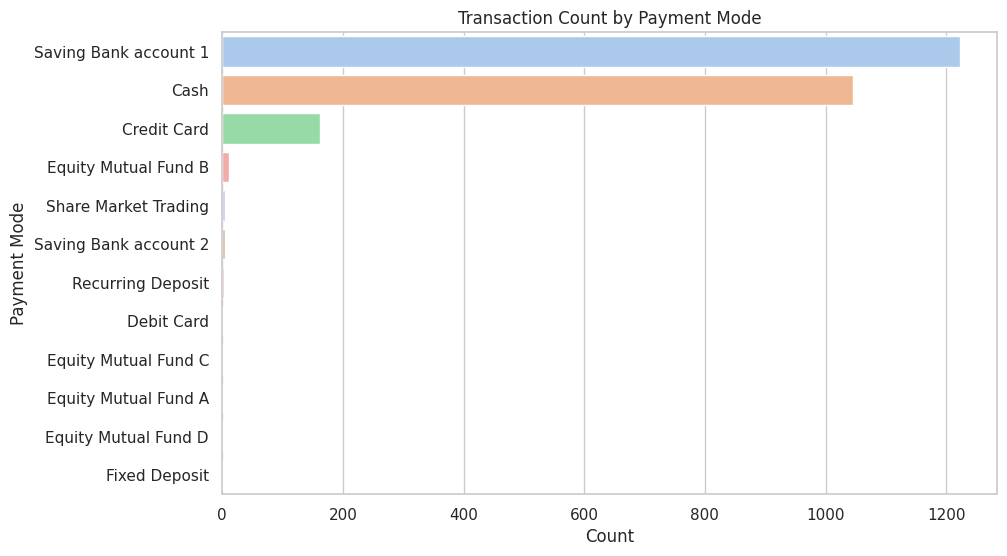

In [9]:
plt.figure(figsize=(10, 6))
mode_counts = data['Mode'].value_counts()
sns.barplot(y=mode_counts.index, x=mode_counts.values, palette='pastel')
plt.title('Transaction Count by Payment Mode')
plt.xlabel('Count')
plt.ylabel('Payment Mode')
plt.show()

In [10]:
data['Month'] = data['Date'].dt.month
data['DayOfWeek'] = data['Date'].dt.dayofweek

In [13]:
label_enc = LabelEncoder()
for col in ['Mode', 'Category', 'Subcategory', 'Income/Expense']:
    data[col] = label_enc.fit_transform(data[col])

In [14]:
data.drop(['Date', 'Note', 'Currency'], axis=1, inplace=True)

In [15]:
X = data.drop('Income/Expense', axis=1)
y = data['Income/Expense']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
y_pred = rf_model.predict(X_test)

In [19]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       649
           1       0.87      0.76      0.81        34
           2       0.83      0.93      0.87        56

    accuracy                           0.97       739
   macro avg       0.89      0.89      0.89       739
weighted avg       0.97      0.97      0.97       739

Confusion Matrix:
 [[637   2  10]
 [  7  26   1]
 [  2   2  52]]


In [22]:
y_prob = rf_model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.9939639202291018


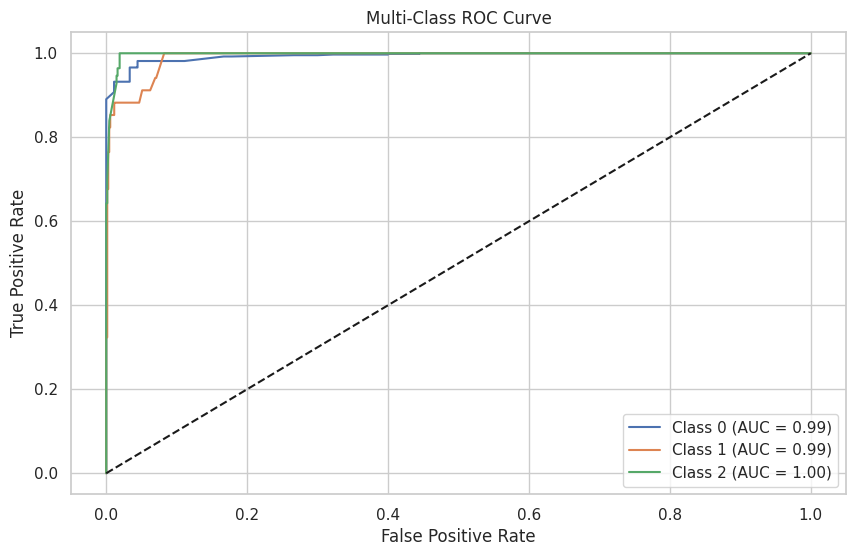

In [32]:
y_test_binarized = label_binarize(y_test, classes=np.unique(y))
plt.figure(figsize=(10, 6))
for i in range(len(np.unique(y))):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc_score(y_test_binarized[:, i], y_prob[:, i]):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend()
plt.show()

